Para evaluar la capacidad de generalización de tu modelo basado en el código proporcionado, es fundamental analizar cómo se elige el conjunto de entrenamiento y el impacto de esta elección en la capacidad del modelo para generalizar a nuevos datos.

1. ¿Cómo elegirían el mejor conjunto de entrenamiento?

En tu código, estás utilizando validación cruzada con KFold de 5 particiones (n_splits=5), lo cual es una práctica estándar para evaluar el rendimiento del modelo en diferentes subconjuntos de datos. Sin embargo, para elegir el mejor conjunto de entrenamiento, podrías considerar los siguientes aspectos:

Representatividad de los Datos:

Asegúrate de que el conjunto de entrenamiento sea representativo de la distribución completa de los datos.
Incluye una variedad adecuada de valores para cada característica (x1, x2, x3) y para la variable objetivo (y).
Aleatorización:

El parámetro shuffle=True en KFold ya garantiza que los datos se mezclen antes de dividirse, reduciendo el sesgo en la selección de conjuntos de entrenamiento y prueba.
Esto ayuda a que cada partición sea más representativa del conjunto total.
Tamaño del Conjunto de Entrenamiento:

Con un conjunto de datos pequeño, es importante maximizar la cantidad de datos para entrenamiento sin comprometer la validación.
Puedes experimentar con diferentes valores de n_splits para encontrar un equilibrio entre el tamaño del conjunto de entrenamiento y el conjunto de prueba.
Estrategias de Muestreo:

Aunque KFold es adecuado, podrías considerar otras estrategias como Leave-One-Out Cross-Validation (LOOCV) si el conjunto de datos es muy pequeño.
Sin embargo, LOOCV puede ser computacionalmente costoso y puede no ofrecer beneficios significativos en este caso.
Análisis Exploratorio:

Realiza un análisis exploratorio de los datos para identificar posibles outliers o valores atípicos que puedan afectar el entrenamiento.
Asegúrate de que estos valores estén distribuidos de manera uniforme en los conjuntos de entrenamiento y prueba.
Conclusión:

El mejor conjunto de entrenamiento se elige asegurando que sea lo más representativo posible de los datos completos, manteniendo la diversidad y variabilidad de las características y la variable objetivo. La aleatorización y la validación cruzada ayudan a minimizar el sesgo y a proporcionar estimaciones más fiables del rendimiento del modelo.

2. ¿Qué efecto tiene dicha elección en la capacidad de generalización?

La elección del conjunto de entrenamiento tiene un impacto directo en la capacidad de generalización del modelo:

Evitar el Sobreajuste (Overfitting):

Si el conjunto de entrenamiento es demasiado específico o contiene patrones no representativos del conjunto total, el modelo puede ajustarse demasiado a esos patrones y fallar al predecir nuevos datos.
Una selección cuidadosa y aleatoria del conjunto de entrenamiento reduce este riesgo.
Mejorar la Robustez del Modelo:

Un conjunto de entrenamiento representativo permite que el modelo aprenda las relaciones verdaderas entre las variables, mejorando su desempeño en datos no vistos.
Esto aumenta la confiabilidad del modelo al aplicarlo en situaciones reales.
Reducción de Sesgos:

Al asegurar que el conjunto de entrenamiento refleje la diversidad del conjunto de datos completo, se minimizan los sesgos que podrían afectar las predicciones.
Esto es especialmente importante si algunas áreas del espacio de características están subrepresentadas.
Validación Más Precisa:

La elección adecuada del conjunto de entrenamiento mejora la precisión de las métricas de validación, como el MSE, MAE y R², proporcionando una evaluación más realista del rendimiento del modelo.
Impacto Específico en tu Código:

Uso de Validación Cruzada:

En tu código, la validación cruzada con KFold permite evaluar el modelo en diferentes particiones, lo que mejora la estimación de su capacidad de generalización.
Cada iteración entrena el modelo en diferentes subconjuntos, lo que ayuda a identificar si el modelo es consistente y estable.
Escalado de Datos:

Al escalar los datos correctamente y utilizar la función de activación tanh, aseguras que el modelo pueda aprender eficientemente y generalizar mejor.
Resultados Obtenidos:

Los valores promedio de las métricas indican una capacidad de generalización razonable, pero también sugieren que hay espacio para mejoras.
Analizar cómo varían estas métricas entre las diferentes particiones puede ofrecer información sobre la sensibilidad del modelo a la selección del conjunto de entrenamiento.
Conclusión:

La elección del conjunto de entrenamiento influye significativamente en la capacidad del modelo para generalizar. Un conjunto bien seleccionado permite que el modelo aprenda patrones relevantes y aplicables a nuevos datos, mientras que una elección inadecuada puede llevar a modelos con pobre desempeño fuera del conjunto de entrenamiento. Tu enfoque actual con validación cruzada y aleatorización es adecuado para maximizar la capacidad de generalización, pero siempre es beneficioso revisar y garantizar que los datos utilizados sean representativos y equilibrados.

Recomendaciones Adicionales:

Aumentar el Conjunto de Datos:

Si es posible, obtener más datos puede mejorar tanto el entrenamiento como la generalización del modelo.
Experimentar con Diferentes Configuraciones:

Probar diferentes números de particiones en KFold o utilizar técnicas como RepeatedKFold para evaluar la estabilidad del modelo.
Análisis de Error:

Analizar casos donde el modelo tiene mayor error puede revelar patrones o características que no están siendo capturadas adecuadamente.
Al reflexionar sobre estas preguntas y ajustar tu enfoque en consecuencia, puedes mejorar la capacidad de generalización de tu modelo y obtener resultados más confiables en aplicaciones prácticas.

In [11]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

from perceptron.perceptron_non_linear import PerceptronNonLinear
from perceptron.perceptron_linear import PerceptronLinear

# Cargar datos
data = pd.read_csv('../res/TP3-ej2-conjunto.csv')
X = data[['x1', 'x2', 'x3']].values
y = data['y'].values

# Escalar los datos
scaler_tanh = MinMaxScaler(feature_range=(-1, 1))  # Tanh models use -1 to 1 range
X_scaled_tanh = scaler_tanh.fit_transform(X)

scaler_sigmoid = MinMaxScaler(feature_range=(0, 1))  # Sigmoid models use 0 to 1 range
X_scaled_sigmoid = scaler_sigmoid.fit_transform(X)

# No scaling for ReLU
scaler_relu = MinMaxScaler(feature_range=(0, 1))  # ReLU models use 0 to 1 range
X_scaled_relu = scaler_relu.fit_transform(X)



# No need to scale the target for metrics calculation
y_scaled_tanh = scaler_tanh.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_sigmoid = scaler_sigmoid.fit_transform(y.reshape(-1, 1)).ravel()
y_scaled_relu = scaler_relu.fit_transform(y.reshape(-1, 1)).ravel()
# Configuración de la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
epochs = 10000
print(kf.split(X))

non_linear_perceptron_params = [
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 0.1, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 0.5, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 1, 'num_epochs':epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 2.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_tanh.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'tanh', 'beta': 5.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 0.1, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 0.5, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 1.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 2.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_sigmoid.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'sigmoid', 'beta': 5.0, 'num_epochs': epochs},
    {'seed': 42, 'num_features': X_scaled_relu.shape[1], 'learning_rate': 0.001, 'epsilon': 1e-5, 'non_linear_fn': 'relu', 'num_epochs': epochs}
]

epsilon = 1e-10  # Small constant to avoid division by zero

# Loop over the perceptron configurations
for params in non_linear_perceptron_params:
    for train_index, test_index in kf.split(X):
        if params['non_linear_fn'] == 'tanh':
            X_train, X_test = X_scaled_tanh[train_index], X_scaled_tanh[test_index]
            y_train, y_test = y_scaled_tanh[train_index], y_scaled_tanh[test_index]
        elif params['non_linear_fn'] == 'sigmoid':
            X_train, X_test = X_scaled_sigmoid[train_index], X_scaled_sigmoid[test_index]
            y_train, y_test = y_scaled_sigmoid[train_index], y_scaled_sigmoid[test_index]
        else:  # ReLU
            X_train, X_test = X_scaled_relu[train_index], X_scaled_relu[test_index]
            y_train, y_test = y_scaled_relu[train_index], y_scaled_relu[test_index]  # No scaling for y in ReLU

        # Initialize and train perceptron
        perceptron = PerceptronNonLinear(
            seed=params['seed'],
            num_features=params['num_features'],
            learning_rate=params['learning_rate'],
            epsilon=params['epsilon'],
            non_linear_fn=params['non_linear_fn'],
            beta=params.get('beta', 1)  # Beta is optional for some models like relu
        )

        perceptron.train(X_train, y_train, params['num_epochs'])

        # Make predictions
        y_pred = perceptron.predict(X_test)

        # Evaluate model using regression metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100  # Add epsilon to avoid division by zero
        med_ae = median_absolute_error(y_test, y_pred)

        results.append({
            'model': f"{params['non_linear_fn'].capitalize()}-Beta-{params.get('beta', 'N/A')}",
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'mape': mape,
            'med_ae': med_ae
        })
        
# Calculate average metrics for each model
metrics = ['MSE', 'MAE', 'R2', 'RMSE', 'MAPE', 'Median AE']
model_names = list(set([res['model'] for res in results]))


<generator object _BaseKFold.split at 0x77b46bfd9030>
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not converge in 10000 epochs
Perceptron did not con

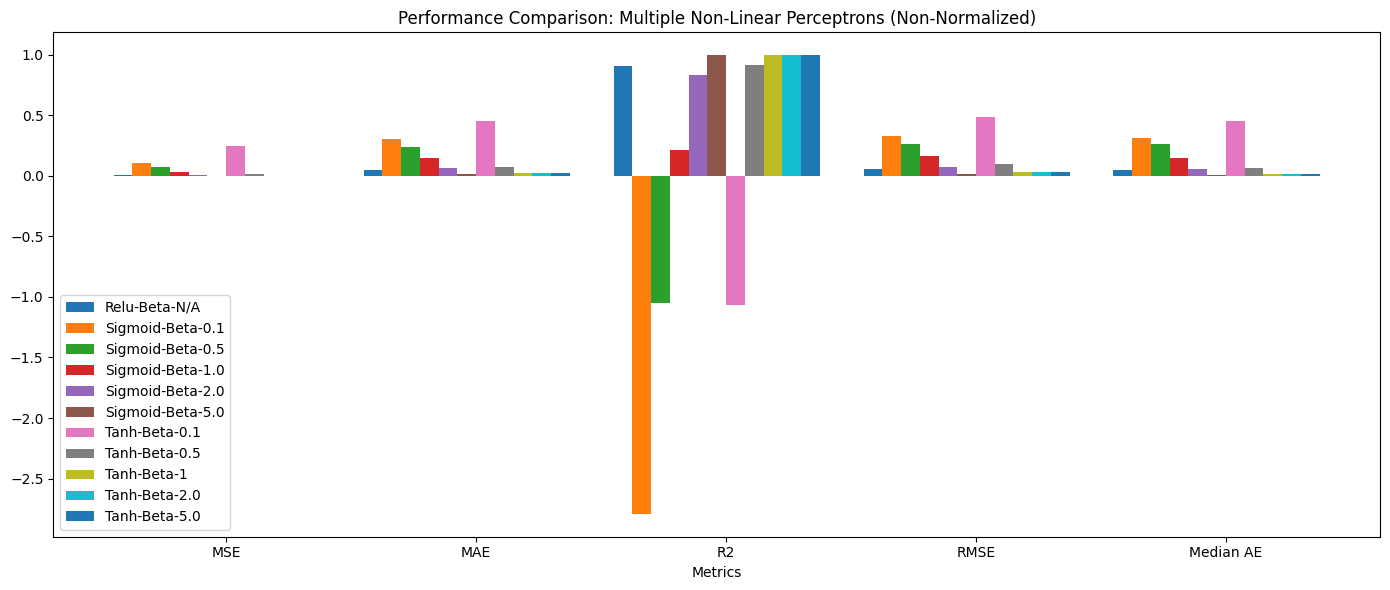

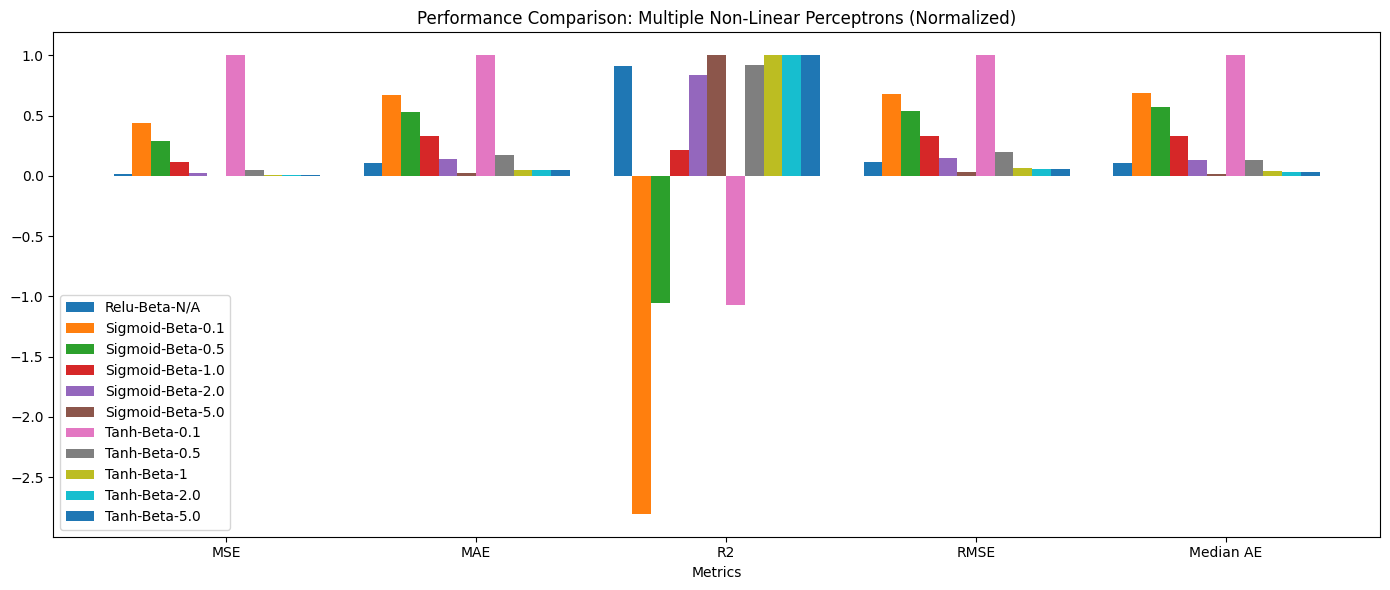

In [17]:
# Update metrics list to remove 'MAPE'
metrics = ['MSE', 'MAE', 'R2', 'RMSE', 'Median AE']  # Removed MAPE
key_map = {'MSE': 'mse', 'MAE': 'mae', 'R2': 'r2', 'RMSE': 'rmse', 'Median AE': 'med_ae'}

# Function to extract the beta value for sorting
def extract_beta(model_name):
    # Extract beta from model name (assumes format "Activation-Beta-X")
    try:
        beta_str = model_name.split('-Beta-')[-1]
        return float(beta_str) if beta_str != 'N/A' else float('inf')  # N/A becomes "infinity" for ReLU
    except ValueError:
        return float('inf')  # Handle any unexpected cases with a fallback

# Sort model names first by function, then by beta value
model_names_sorted = sorted(model_names, key=lambda x: (x.split('-')[0], extract_beta(x)))

# Calculate average metrics for each model, excluding ReLU models
average_metrics = {model: {key_map[metric]: np.mean([res[key_map[metric]] for res in results if res['model'] == model]) for metric in metrics} for model in model_names_sorted}

# Increase space between bars by adding a larger offset
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(metrics)) * 2  # Increasing the space between the label locations
width = 0.15  # The width of the bars

# Add all models to the graph
for i, model in enumerate(model_names_sorted):
    values = [average_metrics[model][key_map[metric]] for metric in metrics]
    ax.bar(x + i * width, values, width, label=model)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison: Multiple Non-Linear Perceptrons (Non-Normalized)')
ax.set_xticks(x + width * (len(model_names_sorted) / 2))
ax.set_xticklabels(metrics)
ax.legend()

# Display the non-normalized graph
plt.tight_layout()
plt.show()

# Now normalize the metrics for a second graph
max_values = {metric: max([average_metrics[model][key_map[metric]] for model in model_names_sorted]) for metric in metrics}
normalized_metrics = {model: {key_map[metric]: average_metrics[model][key_map[metric]] / max_values[metric] for metric in metrics} for model in model_names_sorted}

# Increase space between bars for normalized graph
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(metrics)) * 2  # Again increasing the space between metrics

for i, model in enumerate(model_names_sorted):
    normalized_values = [normalized_metrics[model][key_map[metric]] for metric in metrics]
    ax.bar(x + i * width, normalized_values, width, label=model)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison: Multiple Non-Linear Perceptrons (Normalized)')
ax.set_xticks(x + width * (len(model_names_sorted) / 2))
ax.set_xticklabels(metrics)
ax.legend()

# Display the normalized graph
plt.tight_layout()
plt.show()



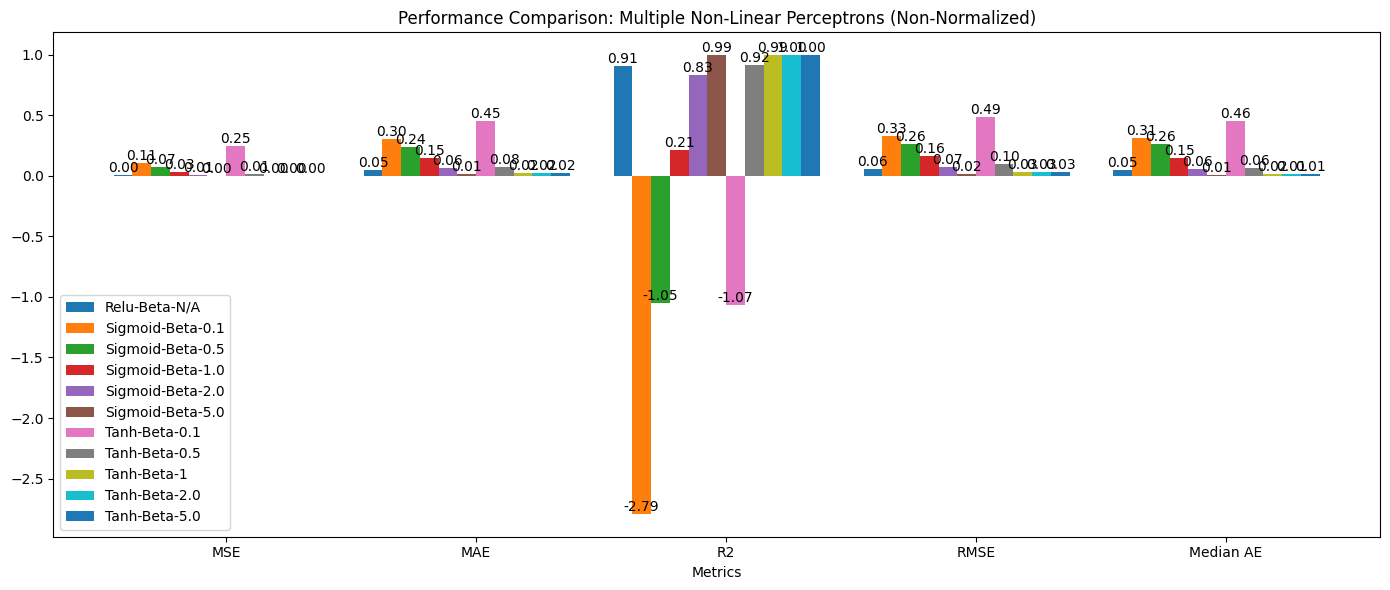

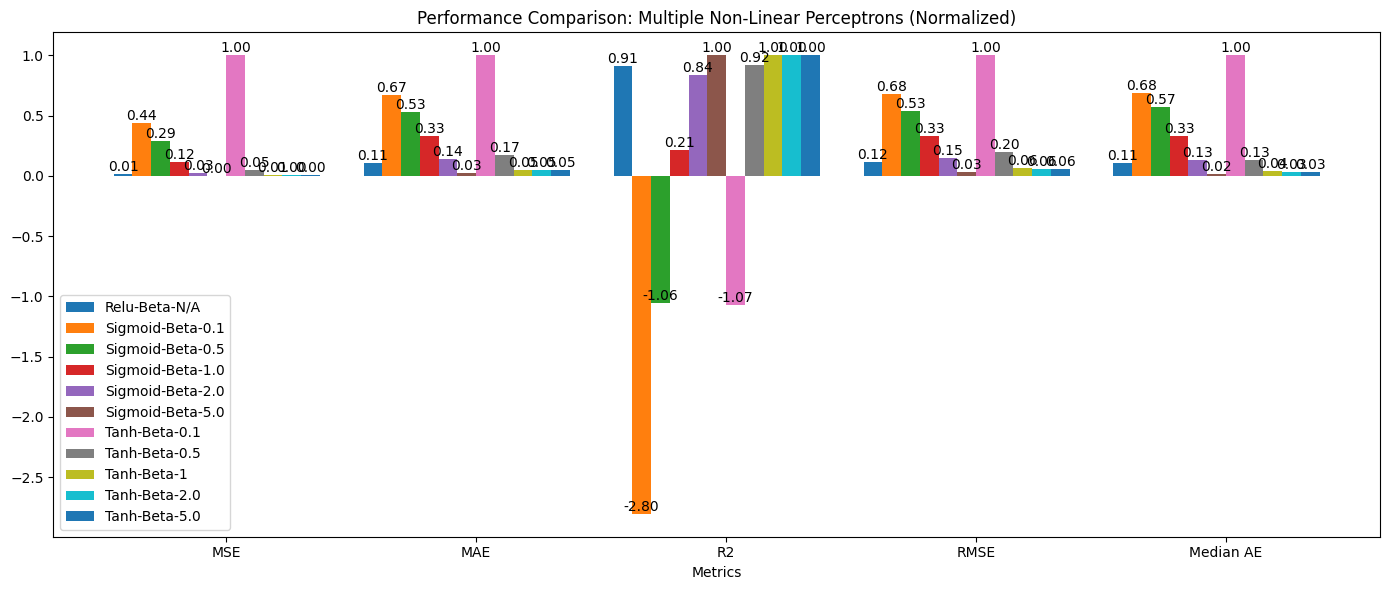

In [18]:
# Update metrics list to remove 'MAPE'
metrics = ['MSE', 'MAE', 'R2', 'RMSE', 'Median AE']  # Removed MAPE
key_map = {'MSE': 'mse', 'MAE': 'mae', 'R2': 'r2', 'RMSE': 'rmse', 'Median AE': 'med_ae'}

# Function to extract the beta value for sorting
def extract_beta(model_name):
    # Extract beta from model name (assumes format "Activation-Beta-X")
    try:
        beta_str = model_name.split('-Beta-')[-1]
        return float(beta_str) if beta_str != 'N/A' else float('inf')  # N/A becomes "infinity" for ReLU
    except ValueError:
        return float('inf')  # Handle any unexpected cases with a fallback

# Sort model names first by function, then by beta value
model_names_sorted = sorted(model_names, key=lambda x: (x.split('-')[0], extract_beta(x)))

# Calculate average metrics for each model, excluding ReLU models
average_metrics = {model: {key_map[metric]: np.mean([res[key_map[metric]] for res in results if res['model'] == model]) for metric in metrics} for model in model_names_sorted}

# Increase space between bars by adding a larger offset
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(metrics)) * 2  # Increasing the space between the label locations
width = 0.15  # The width of the bars

# Add all models to the graph
for i, model in enumerate(model_names_sorted):
    values = [average_metrics[model][key_map[metric]] for metric in metrics]
    bars = ax.bar(x + i * width, values, width, label=model)

    # Add text annotations on the bars to display values
    for bar, value in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{value:.2f}',  # Adjust number of decimals as needed
            ha='center', va='bottom', fontsize=10
        )

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison: Multiple Non-Linear Perceptrons (Non-Normalized)')
ax.set_xticks(x + width * (len(model_names_sorted) / 2))
ax.set_xticklabels(metrics)
ax.legend()

# Display the non-normalized graph
plt.tight_layout()
plt.show()

# Now normalize the metrics for a second graph
max_values = {metric: max([average_metrics[model][key_map[metric]] for model in model_names_sorted]) for metric in metrics}
normalized_metrics = {model: {key_map[metric]: average_metrics[model][key_map[metric]] / max_values[metric] for metric in metrics} for model in model_names_sorted}

# Increase space between bars for normalized graph
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(metrics)) * 2  # Again increasing the space between metrics

for i, model in enumerate(model_names_sorted):
    normalized_values = [normalized_metrics[model][key_map[metric]] for metric in metrics]
    bars = ax.bar(x + i * width, normalized_values, width, label=model)

    # Add text annotations on the bars to display normalized values
    for bar, value in zip(bars, normalized_values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{value:.2f}',  # Adjust number of decimals as needed
            ha='center', va='bottom', fontsize=10
        )

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison: Multiple Non-Linear Perceptrons (Normalized)')
ax.set_xticks(x + width * (len(model_names_sorted) / 2))
ax.set_xticklabels(metrics)
ax.legend()

# Display the normalized graph
plt.tight_layout()
plt.show()
